<a href="https://colab.research.google.com/github/matusoff/Molecular_dynamics/blob/main/RMSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mdtraj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mdtraj: filename=mdtraj-1.9.7-cp38-cp38-linux_x86_64.whl size=8467658 sha256=b46377189a1ce7962e5e24c52eb7751f6f402bd6268d98916951cb7f66cf6fd8
  Stored in directory: /root/.cache/pip/wheels/68/ff/96/5d9a2efac5e5918e5c8fd799e8703e2f8b804a029bcbbd2431
Successfully built mdtraj


In [ ]:
import mdtraj as md

traj1 = md.load("/content/sample_data/2zwh.pdb")
traj2 = md.load("/content/sample_data/2zwh_all_3-NT-bySIN18112021.pdb")

atom_indices = traj1.topology.select("name == 'CA'")

traj2 = traj2.superpose(traj1, atom_indices=atom_indices)

rmsd = md.rmsd(traj2, traj1, atom_indices=atom_indices)
print("RMSD:", rmsd)

RMSD: [0.70066565]


Number of frames in traj1: 1
Number of frames in traj2: 1
Shape of superposed trajectory: (1, 2994, 3)
Indices of selected atoms: [   1    9   18   26   35   42   49   54   62   69   75   83   91   95
  101  105  113  120  129  134  138  149  154  158  166  174  179  186
  197  202  209  220  227  233  241  248  252  263  270  281  291  300
  304  311  319  326  330  338  342  351  360  368  374  386  393  397
  405  414  419  428  434  443  454  458  466  474  481  489  498  510
  517  525  534  545  549  557  565  572  580  594  602  610  618  627
  636  644  658  668  678  685  696  708  716  725  733  744  751  756
  763  772  781  791  798  805  813  821  828  837  842  849  857  865
  872  881  886  894  905  914  923  931  938  947  955  963  974  983
  990 1001 1009 1016 1023 1028 1036 1048 1055 1060 1068 1077 1082 1089
 1097 1103 1111 1123 1128 1134 1138 1149 1156 1163 1167 1175 1182 1190
 1198 1204 1208 1216 1220 1227 1234 1244 1252 1259 1266 1274 1286 1295
 1299 1311 1316 13

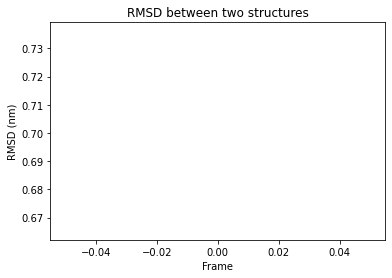

In [ ]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

traj1 = md.load("/content/sample_data/2zwh.pdb")
traj2 = md.load("/content/sample_data/2zwh_all_3-NT-bySIN18112021.pdb")

atom_indices = traj1.topology.select("name == 'CA'")

traj2 = traj2.superpose(traj1, atom_indices=atom_indices)


rmsd = np.zeros(traj1.n_frames)

print(f"Number of frames in traj1: {traj1.n_frames}")
print(f"Number of frames in traj2: {traj2.n_frames}")
print(f"Shape of superposed trajectory: {traj2.xyz.shape}")
print(f"Indices of selected atoms: {atom_indices}")

for i in range(traj1.n_frames):
    rmsd[i] = md.rmsd(traj2[i], traj1[i], atom_indices=atom_indices)

    print(rmsd[i])


# plt.plot(rmsd)
# plt.xlabel("Frame")
# plt.ylabel("RMSD (nm)")
# plt.title("RMSD between two structures")
# plt.show()


In [ ]:
import mdtraj as md
import numpy as np

# Load the pdb structure
traj = md.load("/content/sample_data/2zwh.pdb")

# Define the number of frames to generate
n_frames = 3


# Calculate the starting RMSD values for each frame
rmsd_start = np.zeros(20)

for i in range(3):
    traj_temp = traj.superpose(traj, frame=i)
    rmsd_start[i] = md.rmsd(traj, traj_temp)

# Define the temperature for the Monte Carlo simulation
temperature = 300

# Perform the Monte Carlo simulation
for i in range(n_frames):
    # Randomly perturb the coordinates of the current frame
    traj[i].xyz += np.random.normal(scale=np.sqrt(temperature), size=traj[i].xyz.shape)

    # Calculate the RMSD of the perturbed frame
    traj_temp = traj.superpose(traj, frame=i)
    rmsd = md.rmsd(traj, traj_temp)

    # Decide whether to accept or reject the perturbed frame based on the Boltzmann distribution
    delta_E = rmsd**2 - rmsd_start[i]**2
    if np.random.rand() > np.exp(-delta_E / temperature):
        traj[i].xyz -= np.random.normal(scale=np.sqrt(temperature), size=traj[i].xyz.shape)

# Save the generated frames as a new pdb structure
md.save_pdb("/content/sample_data/2zwh_generated_frames.pdb", traj)


In [ ]:
!pip install openmm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for openmm: filename=openmm-0.2-py3-none-any.whl size=61167 sha256=dc905db38f820a06a4c65517ea4203ebbbef50689c8f1dd0ac308a56edc52789
  Stored in directory: /root/.cache/pip/wheels/4a/0e/d0/df01fddace1f93053fd8d3743be08e391aaa6c34dee8d03f63
Successfully built openmm


In [ ]:
!pip install simtk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from simtk import openmm, unit

# Create a Lennard-Jones fluid
pressure = 80*unit.atmospheres
temperature = 120*unit.kelvin
collision_rate = 5/unit.picoseconds
timestep = 2.5*unit.femtoseconds
from openmmtools.testsystems import LennardJonesFluid
sigma = 3.4*unit.angstrom; epsilon = 0.238 * unit.kilocalories_per_mole
fluid = LennardJonesFluid(sigma=sigma, epsilon=epsilon)
[system, positions] = [fluid.system, fluid.positions]

# Add a barostat
barostat = openmm.MonteCarloBarostat(pressure, temperature)
system.addForce(barostat)

# Retrieve the NonbondedForce
forces = { force.__class__.__name__ : force for force in system.getForces() }
nbforce = forces['NonbondedForce']

# Add a CustomNonbondedForce to handle only alchemically-modified interactions
alchemical_particles = set([0])
chemical_particles = set(range(system.getNumParticles())) - alchemical_particles
energy_function = 'lambda*4*epsilon*x*(x-1.0); x = (sigma/reff_sterics)^6;'
energy_function += 'reff_sterics = sigma*(0.5*(1.0-lambda) + (r/sigma)^6)^(1/6);'
energy_function += 'sigma = 0.5*(sigma1+sigma2); epsilon = sqrt(epsilon1*epsilon2);'
custom_force = openmm.CustomNonbondedForce(energy_function)
custom_force.addGlobalParameter('lambda', 1.0)
custom_force.addPerParticleParameter('sigma')
custom_force.addPerParticleParameter('epsilon')
for index in range(system.getNumParticles()):
    [charge, sigma, epsilon] = nbforce.getParticleParameters(index)
    custom_force.addParticle([sigma, epsilon])
    if index in alchemical_particles:
        nbforce.setParticleParameters(index, charge*0, sigma, epsilon*0)
custom_force.addInteractionGroup(alchemical_particles, chemical_particles)
system.addForce(custom_force)

# Create a context
integrator = openmm.LangevinIntegrator(temperature, collision_rate, timestep)
context = openmm.Context(system, integrator)
context.setPositions(positions)

# Minimize energy
print('Minimizing energy...')
openmm.LocalEnergyMinimizer.minimize(context)

# Collect data
nsteps = 2500 # number of steps per sample
niterations = 50 # number of samples to collect per alchemical state
import numpy as np
lambdas = np.linspace(1.0, 0.0, 10) # alchemical lambda schedule
nstates = len(lambdas)
u_kln = np.zeros([nstates,nstates,niterations], np.float64)
kT = unit.AVOGADRO_CONSTANT_NA * unit.BOLTZMANN_CONSTANT_kB * integrator.getTemperature()
for k in range(nstates):
    for iteration in range(niterations):
        print('state %5d iteration %5d / %5d' % (k, iteration, niterations))
        # Set alchemical state
        context.setParameter('lambda', lambdas[k])
        # Run some dynamics
        integrator.step(nsteps)
        # Compute energies at all alchemical states
        for l in range(nstates):
            context.setParameter('lambda', lambdas[l])
            u_kln[k,l,iteration] = context.getState(getEnergy=True).getPotentialEnergy() / kT

# Estimate free energy of Lennard-Jones particle insertion
from pymbar import MBAR, timeseries
# Subsample data to extract uncorrelated equilibrium timeseries
N_k = np.zeros([nstates], np.int32) # number of uncorrelated samples
for k in range(nstates):
    [nequil, g, Neff_max] = timeseries.detectEquilibration(u_kln[k,k,:])
    indices = timeseries.subsampleCorrelatedData(u_kln[k,k,:], g=g)
    N_k[k] = len(indices)
    u_kln[k,:,0:N_k[k]] = u_kln[k,:,indices].T
# Compute free energy differences and statistical uncertainties
mbar = MBAR(u_kln, N_k)
[DeltaF_ij, dDeltaF_ij, Theta_ij] = mbar.getFreeEnergyDifferences()

print('DeltaF_ij (kT):')
print(DeltaF_ij)
print('dDeltaF_ij (kT):')
print(dDeltaF_ij)


In [ ]:
!pip install Biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.1 MB/s eta 0:00:00


In [ ]:
from Bio.PDB import *
import Bio.PDB

pdb_parser = PDBParser()
structure = pdb_parser.get_structure('/content/sample_data/2zwh.pdb', '/content/sample_data/2zwh.pdb')
model = structure[0]

for chain in model:
    for residue in chain:
        if residue.get_resname() == 'CYS':
            residue.resname = 'CYX'

io = PDBIO()
io.set_structure(structure)
io.save('2zwh_CYS_oxidized.pdb')


In [ ]:
# Import the Biopython library
from Bio import *
from Bio.SeqUtils import protparam

# Define the sequence of the original tyrosine residue (TYR)
tyr_seq = "TYR"

# Calculate the original hydrophobicity of TYR using the Kyte-Doolittle scale
tyr_original = protparam.kd_scale(tyr_seq)

# Define the sequence of the nitro-tyrosine residue (nitro-TYR)
nitro_tyr_seq = "nitro-TYR"

# Calculate the hydrophobicity of nitro-TYR using the Kyte-Doolittle scale
nitro_tyr = protparam.kd_scale(nitro_tyr_seq)

# Calculate the difference between the original hydrophobicity of TYR and the hydrophobicity of nitro-TYR
difference = nitro_tyr - tyr_original

# Print the result
print("The difference in hydrophobicity between TYR and nitro-TYR is", difference)


In [ ]:
'''
This code uses the assigned hydropathy values of tyrosine and nitro group, 
and calculates the average hydropathy for each. The difference in hydropathy 
between the two values represents the estimated effect of the nitro group binding 
on the tyrosine hydropathy.
'''

# Define the hydropathy values for tyrosine and nitro group
tyr_h = -1.3
no2_h = -0.9

# Calculate the average hydropathy of tyrosine
avg_hydropathy_tyr = (tyr_h + tyr_h) / 2

# Calculate the average hydropathy of tyrosine with nitro group binding
avg_hydropathy_tyr_no2 = (tyr_h + no2_h) / 2

# Print the results
print("Average hydropathy of tyrosine:", avg_hydropathy_tyr)
print("Average hydropathy of tyrosine with nitro group binding:", avg_hydropathy_tyr_no2)

# Calculate the difference in hydropathy
diff = avg_hydropathy_tyr_no2 - avg_hydropathy_tyr
print("Difference in hydropathy:", diff)




Average hydropathy of tyrosine: -1.3
Average hydropathy of tyrosine with nitro group binding: -1.1
Difference in hydropathy: 0.19999999999999996


In [ ]:
#calculate hydrophobic and hidrophylic area in structure
from Bio.PDB import *
import Bio.PDB
from Bio.PDB import PDBParser

# Load the PDB file
parser = PDBParser()
structure = parser.get_structure("structure", "/content/sample_data/2zwh.pdb")

# Define the Kyte-Doolittle hydrophobicity scale
KYTE_DOOLITTLE_SCALE = {
    "ALA": 1.8,
    "ARG": -4.5,
    "ASN": -3.5,
    "ASP": -3.5,
    "CYS": 2.5,
    "GLN": -3.5,
    "GLU": -3.5,
    "GLY": -0.4,
    "HIS": -3.2,
    "ILE": 4.5,
    "LEU": 3.8,
    "LYS": -3.9,
    "MET": 1.9,
    "PHE": 2.8,
    "PRO": -1.6,
    "SER": -0.8,
    "THR": -0.7,
    "TRP": -0.9,
    "TYR": -1.3,
    "VAL": 4.2
}

# Calculate the hydrophobicity and hydrophilicity of each residue
hydrophobicity = []
hydrophilicity = []
for residue in structure.get_residues():
    residue_name = residue.get_resname()
    kd_score = KYTE_DOOLITTLE_SCALE.get(residue_name, 0)
    if kd_score > 0:
        hydrophobicity.append(residue)
    else:
        hydrophilicity.append(residue)

# Print the results
print("Number of hydrophobic residues:", len(hydrophobicity))
print("Number of hydrophilic residues:", len(hydrophilicity))


Number of hydrophobic residues: 139
Number of hydrophilic residues: 238


In [ ]:
#calculate hydrophobic and hidrophylic area in structure
from Bio.PDB import *
import Bio.PDB
from Bio.PDB import PDBParser

# Load the PDB file
parser = PDBParser()
structure = parser.get_structure("structure", "/content/sample_data/2zwh_all_3-NT-bySIN18112021.pdb")

# Define the Kyte-Doolittle hydrophobicity scale
KYTE_DOOLITTLE_SCALE = {
    "ALA": 1.8,
    "ARG": -4.5,
    "ASN": -3.5,
    "ASP": -3.5,
    "CYS": 2.5,
    "GLN": -3.5,
    "GLU": -3.5,
    "GLY": -0.4,
    "HIS": -3.2,
    "ILE": 4.5,
    "LEU": 3.8,
    "LYS": -3.9,
    "MET": 1.9,
    "PHE": 2.8,
    "PRO": -1.6,
    "SER": -0.8,
    "THR": -0.7,
    "TRP": -0.9,
    "TYR": -1.3,
    "VAL": 4.2
}

# Calculate the hydrophobicity and hydrophilicity of each residue
hydrophobicity = []
hydrophilicity = []
for residue in structure.get_residues():
    residue_name = residue.get_resname()
    kd_score = KYTE_DOOLITTLE_SCALE.get(residue_name, 0)
    if kd_score > 0:
        hydrophobicity.append(residue)
    else:
        hydrophilicity.append(residue)

# Print the results
print("Number of hydrophobic residues:", len(hydrophobicity))
print("Number of hydrophilic residues:", len(hydrophilicity))

Number of hydrophobic residues: 139
Number of hydrophilic residues: 238


In [ ]:
from Bio.PDB import *
import Bio.PDB
from Bio.PDB import PDBParser

# parse the PDB file
parser = PDBParser(PERMISSIVE=1)
structure = parser.get_structure("structure", "/content/sample_data/2zwh_all_3-NT-bySIN18112021.pdb")

# get the sequence of residues
residues = [res.get_resname() for res in structure.get_residues()]

# create a dictionary for the hydropathy index
hydropathy_index = {'CYS': 2.5, 'ASP':-3.5, 'SER':-0.8, 'GLN':-3.5, 'LYS':-3.9,
                   'ILE': 4.5, 'PRO':-1.6, 'THR':-0.7, 'PHE': 2.8, 'ASN':-3.5,
                   'GLY':-0.4, 'HIS':-3.2, 'LEU': 3.8, 'ARG':-4.5, 'TRP':-0.9,
                   'ALA': 1.8, 'VAL': 4.2, 'GLU':-3.5, 'TYR':-1.3, 'MET': 1.9}

# calculate the hydrophobicity of the molecule
hydrophobicity = 0
for res in residues:
    if res in hydropathy_index:
        hydrophobicity += hydropathy_index[res]
    elif res == 'NIY':
        hydrophobicity += -1.1

# print the result
print("The hydrophobicity of the molecule is:", hydrophobicity)


The hydrophobicity of the molecule is: -86.60000000000012


In [ ]:
from Bio.PDB import *
import Bio.PDB
from Bio.PDB import PDBParser

# parse the PDB file
parser = PDBParser(PERMISSIVE=1)
structure = parser.get_structure("structure", "/content/sample_data/2zwh.pdb")

# get the sequence of residues
residues = [res.get_resname() for res in structure.get_residues()]

# create a dictionary for the hydropathy index
hydropathy_index = {'CYS': 2.5, 'ASP':-3.5, 'SER':-0.8, 'GLN':-3.5, 'LYS':-3.9,
                   'ILE': 4.5, 'PRO':-1.6, 'THR':-0.7, 'PHE': 2.8, 'ASN':-3.5,
                   'GLY':-0.4, 'HIS':-3.2, 'LEU': 3.8, 'ARG':-4.5, 'TRP':-0.9,
                   'ALA': 1.8, 'VAL': 4.2, 'GLU':-3.5, 'TYR':-1.3, 'MET': 1.9}

# calculate the hydrophobicity of the molecule
hydrophobicity = 0
for res in residues:
    if res in hydropathy_index:
        hydrophobicity += hydropathy_index[res]
    elif res == 'NIY':
        hydrophobicity += -1.1

# print the result
print("The hydrophobicity of the molecule is:", hydrophobicity)

The hydrophobicity of the molecule is: -88.8000000000001


In [ ]:
from Bio.PDB import *
import Bio.PDB
from Bio.PDB import PDBParser

hydropathy_index = {
    'A': 1.8, 'C': 2.5, 'D': -3.5, 'E': -3.5, 
    'F': 2.8, 'G': -0.4, 'H': -3.2, 'I': 4.5, 
    'K': -3.9, 'L': 3.8, 'M': 1.9, 'N': -3.5, 
    'P': -1.6, 'Q': -3.5, 'R': -4.5, 'S': -0.8, 
    'T': -0.7, 'V': 4.2, 'W': -0.9, 'Y': -1.3
}

# You can add the modified residue "NIY" and its hydropathy value
hydropathy_index['NIY'] = -1.1

pdb_file = "/content/sample_data/6bno.pdb"

parser = Bio.PDB.PDBParser()
structure = parser.get_structure("structure", pdb_file)

total_hydropathy = 0

for chain in structure.get_chains():
    for residue in chain:
        res_name = residue.resname
        if res_name in hydropathy_index:
            total_hydropathy += hydropathy_index[res_name]

print("The hydrophobicity of the molecule is:", total_hydropathy)


The hydrophobicity of the molecule is: 0


/usr/local/lib/python3.8/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24223.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24251.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 24279.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 24307.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 24335.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 24363.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

In [ ]:
!pip install pymol

In [ ]:
import pymol

# Load the PDB file
pymol.cmd.load("/content/sample_data/2zwh.pdb")

# Select all cysteine residues
pymol.cmd.select("cysteines", "resn CYS")

# Replace the residue name of the selected residues with CYX
pymol.cmd.alter("cysteines", "resn='CYX'")

# Save the modified PDB file
pymol.cmd.save("example_oxidized.pdb", format="pdb")


In [ ]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 33.4 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Load the PDB file
mol = Chem.MolFromPDBFile("/content/sample_data/2zwh.pdb")

# Iterate over the residues in the molecule
for i, residue in enumerate(mol.GetSubstructMatches(Chem.MolFromSmarts("[CYS]"))):
    # Replace the residue name of cysteine with CYX
    mol.GetAtomWithIdx(residue[0]).SetMol(Chem.MolFromSmiles("[CYX]"))

# Write the modified PDB file to disk
with open("/content/2zwh_CYSoxidized_rdkit.pdb", "w") as f:
    f.write(Chem.MolToPDBBlock(mol))


In [ ]:
#oxidation of the certain cysteine residues

from rdkit import Chem
from rdkit.Chem import AllChem

# Load the PDB file
mol = Chem.MolFromPDBFile("example.pdb")

# Define a list of residues to oxidize
residues_to_oxidize = [54, 100, 120]

# Iterate over the residues in the molecule
for i, residue in enumerate(mol.GetSubstructMatches(Chem.MolFromSmarts("[CYS]"))):
    if i+1 in residues_to_oxidize:
        # Replace the residue name of cysteine with CYX
        mol.GetAtomWithIdx(residue[0]).SetMol(Chem.MolFromSmiles("[CYX]"))

# Write the modified PDB file to disk
with open("example_oxidized.pdb", "w") as f:
    f.write(Chem.MolToPDBBlock(mol))


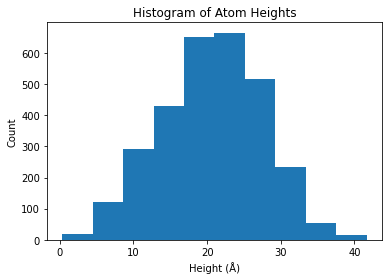

In [ ]:
#heights of the atom in pdb structure
from Bio.PDB import *
from Bio.PDB import *
import numpy as np
import matplotlib.pyplot as plt

# Load the PDB file
parser = PDBParser(QUIET=True)
structure = parser.get_structure("structure", "/content/sample_data/2zwh_all_3-NT-bySIN18112021.pdb")

# Calculate center of mass
mass_sum = 0
com = np.zeros(3)
for atom in structure.get_atoms():
    mass = atom.mass
    com += atom.coord * mass
    mass_sum += mass
com /= mass_sum

# Calculate the height of each atom over the center of mass
heights = []
for atom in structure.get_atoms():
    height = np.linalg.norm(atom.coord - com)
    heights.append(height)

# Plot the histogram of heights
plt.hist(heights)
plt.xlabel("Height (Å)")
plt.ylabel("Count")
plt.title("Histogram of Atom Heights")
plt.show()


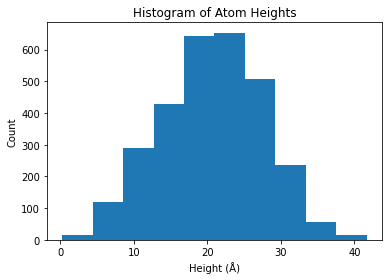

In [ ]:
#heights of the atom in pdb structure
from Bio.PDB import *
from Bio.PDB import *
import numpy as np
import matplotlib.pyplot as plt

# Load the PDB file
parser = PDBParser(QUIET=True)
structure = parser.get_structure("structure", "/content/sample_data/2zwh.pdb")

# Calculate center of mass
mass_sum = 0
com = np.zeros(3)
for atom in structure.get_atoms():
    mass = atom.mass
    com += atom.coord * mass
    mass_sum += mass
com /= mass_sum

# Calculate the height of each atom over the center of mass
heights = []
for atom in structure.get_atoms():
    height = np.linalg.norm(atom.coord - com)
    heights.append(height)

# Plot the histogram of heights
plt.hist(heights)
plt.xlabel("Height (Å)")
plt.ylabel("Count")
plt.title("Histogram of Atom Heights")
plt.show()

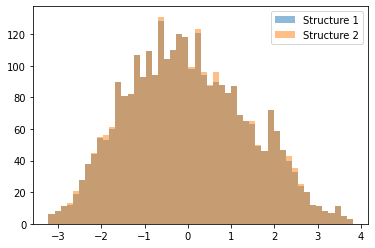

In [ ]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import csv

# Load the PDB file for the first structure
traj1 = md.load("/content/sample_data/2zwh.pdb")

# Calculate the Z-coordinates of all atoms in the first structure
z_coords1 = traj1.xyz[0, :, 2]

# Load the PDB file for the second structure
traj2 = md.load("/content/sample_data/2zwh_all_3-NT-bySIN18112021.pdb")

# Calculate the Z-coordinates of all atoms in the second structure
z_coords2 = traj2.xyz[0, :, 2]

# Write the Z-coordinates to a CSV file for the first structure
with open("structure1_heights.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(zip(z_coords1))

# Write the Z-coordinates to a CSV file for the second structure
with open("structure2_heights.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(zip(z_coords2))

# Plot a histogram of the Z-coordinates for the first structure
plt.hist(z_coords1, bins=50, alpha=0.5, label='Structure 1')

# Plot a histogram of the Z-coordinates for the second structure
plt.hist(z_coords2, bins=50, alpha=0.5, label='Structure 2')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


In [ ]:
#This code will extract the residue number and the z-coordinate 
#of the first atom of each residue in the structure and store it in a csv file 
#called residue_z_coordinate.csv

from Bio.PDB import *
import csv

pdb_file = "/content/sample_data/2zwh_all_3-NT-bySIN18112021.pdb"
structure = PDBParser().get_structure("structure", pdb_file)

# Create a csv file for writing
with open("residue_z_coordinate_2zwh_SIN_1atom_of_each_residue.csv", "w") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Residue", "Z-coordinate"])
    
    # Loop through each residue in the structure
    for residue in structure.get_residues():
        # Get the first atom of the residue
        atom = residue.get_list()[0]
        residue_num = residue.id[1]
        z_coordinate = atom.coord[2]
        
        # Write the residue number and z-coordinate to the csv file
        writer.writerow([residue_num, z_coordinate])


In [ ]:
import mdtraj as md

traj = md.load('/content/sample_data/2zwh.pdb')

with open('residue_z_coordinates.csv', 'w') as f:
    f.write('Residue, Residue Name, Z Coordinate\n')
    for i, atom in enumerate(traj.topology.atoms):
        residue = atom.residue
        residue_name = residue.name
        z_coordinate = traj.xyz[0][i][2]
        f.write(f'{residue.index}, {residue_name}, {z_coordinate}\n')


In [ ]:
import mdtraj as md

traj = md.load('/content/sample_data/2zwh_all_3-NT-bySIN18112021.pdb')

with open('residue_z_coordinates_2zwh_SIN.csv', 'w') as f:
    f.write('Residue, Residue Name, Z Coordinate\n')
    for i, atom in enumerate(traj.topology.atoms):
        residue = atom.residue
        residue_name = residue.name
        z_coordinate = traj.xyz[0][i][2]
        f.write(f'{residue.index}, {residue_name}, {z_coordinate}\n')

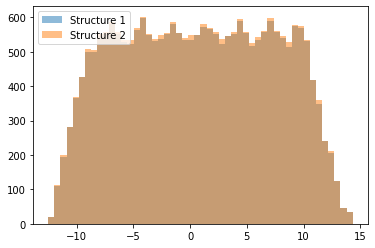

In [ ]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import csv

# Load the PDB file for the first structure
traj1 = md.load("/content/sample_data/6bno.pdb")

# Calculate the Z-coordinates of all atoms in the first structure
z_coords1 = traj1.xyz[0, :, 2]

# Load the PDB file for the second structure
traj2 = md.load("/content/sample_data/6bno_3NT_03122021.pdb")

# Calculate the Z-coordinates of all atoms in the second structure
z_coords2 = traj2.xyz[0, :, 2]

# Write the Z-coordinates to a CSV file for the first structure
with open("structure1_heights.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(zip(z_coords1))

# Write the Z-coordinates to a CSV file for the second structure
with open("structure2_heights.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(zip(z_coords2))

# Plot a histogram of the Z-coordinates for the first structure
plt.hist(z_coords1, bins=50, alpha=0.5, label='Structure 1')

# Plot a histogram of the Z-coordinates for the second structure
plt.hist(z_coords2, bins=50, alpha=0.5, label='Structure 2')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

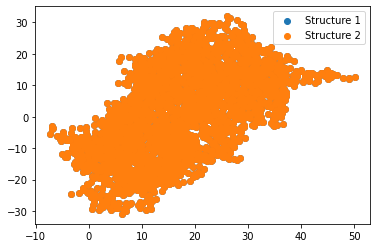

In [ ]:
'''
In this code, the get_xy_coords function takes a PDB file as input 
and returns a list of lists containing the atom name, x coordinate, and y coordinate. 
The function uses the Bio.PDB library to parse the PDB file and extract the coordinates of each atom. 
Then, the x, y coordinates are saved to separate CSV files using the pandas
library, and finally, the data is plotted using the Matplotlib library.
'''
import Bio.PDB
import pandas as pd
import matplotlib.pyplot as plt

def get_xy_coords(pdb_file):
    parser = Bio.PDB.PDBParser()
    structure = parser.get_structure("structure", pdb_file)
    xy_coords = []
    for model in structure:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    xy_coords.append([atom.get_name(), atom.get_coord()[0], atom.get_coord()[1]])
    return xy_coords

# Example for two PDB structures
pdb1 = "/content/sample_data/2zwh.pdb"
pdb2 = "/content/sample_data/2zwh_all_3-NT-bySIN18112021.pdb"

# Get x, y coordinates for each structure
xy_coords1 = get_xy_coords(pdb1)
xy_coords2 = get_xy_coords(pdb2)

# Save x, y coordinates to CSV files
df1 = pd.DataFrame(xy_coords1, columns=["Atom name", "x", "y"])
df1.to_csv("xy_coords1.csv", index=False)

df2 = pd.DataFrame(xy_coords2, columns=["Atom name", "x", "y"])
df2.to_csv("xy_coords2.csv", index=False)

# Plot the x, y coordinates for each structure
plt.scatter(df1["x"], df1["y"], label="Structure 1")
plt.scatter(df2["x"], df2["y"], label="Structure 2")
plt.legend()
plt.show()


In [ ]:
'''
This code loads the PDB file using the Bio.PDB library, sele
residue (in this case, residue 100 in chain A), and loops through all atoms 
in the residue to extract their x and y coordinates. The coordinates
are then stored in a list and written to a CSV file.
'''

from Bio.PDB import *
import csv

# Load the PDB file
parser = PDBParser()
structure1 = parser.get_structure("structure", "/content/sample_data/2zwh.pdb")
structure2 = parser.get_structure("structure", "/content/sample_data/2zwh_all_3-NT-bySIN18112021.pdb")

# Select the desired residue
residue = structure1[0]["A"][53]
residue = structure2[0]["A"][53]

# Create a list to store the x, y coordinates
coordinates = []

# Loop through all atoms in the residue
for atom in residue:
    x = atom.coord[0]
    y = atom.coord[1]
    coordinates.append([x, y])

print(coordinates)

# # Write the x, y coordinates to a CSV file
# with open("residue_coordinates.csv", "w") as f:
#     writer = csv.writer(f)
#     writer.writerows(coordinates)


[[19.655, 12.016], [20.453, 10.81], [20.29, 10.425], [19.166, 10.345], [19.871, 9.715], [19.367, 10.124], [20.104, 9.821], [18.139, 10.777], [19.625, 10.174], [17.656, 11.123], [18.396, 10.827], [17.866, 11.183], [20.307, 9.899], [19.666, 9.812], [21.688, 9.688]]


In [ ]:
'''
This code will store the x,y coordinates of each atom around the specified 
residue for both structures in a single DataFrame and save it to a CSV file. 
The plot will show the x,y coordinates as a scatter plot with different colors 
for each structure, allowing you to visualize and compare the two structures.
'''

import Bio.PDB
import pandas as pd

# Load the two PDB structures
pdb1 = Bio.PDB.PDBParser().get_structure("pdb1", "/content/sample_data/2zwh.pdb")
pdb2 = Bio.PDB.PDBParser().get_structure("pdb2", "/content/sample_data/2zwh_all_3-NT-bySIN18112021.pdb")

# Specify the residue number and chain ID to analyze
res_num = 294
chain_id = "A"

# Initialize a list to store the x,y coordinates of each atom
coordinates = []

# Loop over the two structures
for structure in [pdb1, pdb2]:
    for model in structure:
        for chain in model:
            if chain.id == chain_id:
                for residue in chain:
                    if residue.id[1] == res_num:
                        for atom in residue:
                            x, y, z = atom.coord
                            coordinates.append([x, y, structure.id])

# Convert the list of coordinates into a DataFrame
df = pd.DataFrame(coordinates, columns=["x", "y", "structure"])

# Save the DataFrame to a CSV file
df.to_csv("x,y_coordinates.csv", index=False)

# Plot the data using a scatter plot
import matplotlib.pyplot as plt

# plt.scatter(df["x"], df["y"], c=df["structure"], cmap="viridis")
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("Coordinates Around Residue %d Chain %s" % (res_num, chain_id))
# plt.show()


In [ ]:
#analysis of pixels in hs-afm simulated image
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import numpy as np

# Load the image
img = mpimg.imread('/content/sample_data/2zwh-VdW.png')

# Flatten the image into a 1D array
pixels = img.flatten()

# Plot a histogram of the pixel values
plt.hist(pixels, bins=256, range=(0, 256), color='blue', alpha=0.5)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Pixel Value Histogram')
plt.show()
